In [70]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [71]:
# 📌 Step 2: Load the Dataset
file_path = "C:/Users/subha/Desktop/BITS LEARNING/DVI Assignment/DVI_ASSIGNMENT2_PS6 (1)/DVI_ASSIGNMENT2_PS6/dvi-a2-ps6-data.csv"  # Update this if needed
df = pd.read_csv(file_path)


In [72]:
# Display basic information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  19 non-null     object 
 1   Segment   19 non-null     object 
 2   2001-02   18 non-null     float64
 3   2002-03   18 non-null     float64
 4   2003-04   18 non-null     float64
 5   2004-05   18 non-null     float64
 6   2005-06   18 non-null     float64
 7   2006-07   19 non-null     int64  
 8   2007-08   19 non-null     int64  
 9   2008-09   19 non-null     int64  
 10  2009-10   19 non-null     int64  
 11  2010-11   12 non-null     float64
 12  2011-12   12 non-null     float64
 13  2012-13   12 non-null     float64
dtypes: float64(8), int64(4), object(2)
memory usage: 2.2+ KB


,Category,Segment,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13
0,Passenger Vehicles (PVs),Passenger Cars,500301.0,557410.0,782562.0,960487.0,1046133.0,1238032,1426212,1516967,1932620,2453113.0,2775124.0,2668633.0
1,Passenger Vehicles (PVs),Multi-Utility Vehicles,169418.0,165920.0,206998.0,249389.0,263167.0,307202,351371,321626,424791,534183.0,370945.0,564928.0
2,Passenger Vehicles (PVs),Total Passenger Vehicles (PVs),669719.0,723330.0,989560.0,1209876.0,1309300.0,1545234,1777583,1838593,2357411,2987296.0,3146069.0,3233561.0
3,Commercial Vehicles (CVs) M & HCVs,Passenger Carriers,20283.0,21156.0,27628.0,30419.0,28982.0,32828,46542,40995,46026,NaN,NaN,NaN
4,Commercial Vehicles (CVs) M & HCVs,Goods Carriers,76469.0,99346.0,138495.0,184388.0,190313.0,261438,248415,151288,204145,NaN,NaN,NaN


In [66]:
print("Original Data:")
print(df)

Original Data:
                              Category                          Segment  \
0             Passenger Vehicles (PVs)                   Passenger Cars   
1             Passenger Vehicles (PVs)           Multi-Utility Vehicles   
2             Passenger Vehicles (PVs)   Total Passenger Vehicles (PVs)   
3   Commercial Vehicles (CVs) M & HCVs               Passenger Carriers   
4   Commercial Vehicles (CVs) M & HCVs                   Goods Carriers   
5   Commercial Vehicles (CVs) M & HCVs                   Total M & HCVs   
6                                 LCVs               Passenger Carriers   
7                                 LCVs                   Goods Carriers   
8                                 LCVs                       Total LCVs   
9      Total Commercial Vehicles (CVs)  Total Commercial Vehicles (CVs)   
10                      Three Wheelers               Passenger Carriers   
11                      Three Wheelers                   Goods Carriers   
12        

In [73]:
# Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# 1. Handling Missing Values
imputer_mean = SimpleImputer(strategy='mean')
df[['2001-02','2002-03','2003-04','2004-05','2005-06','2010-11','2011-12','2012-13']] = imputer_mean.fit_transform(df[['2001-02','2002-03','2003-04','2004-05','2005-06','2010-11','2011-12','2012-13']])

# Drop missing values (if a few rows are affected)
df_cleaned = df

# Check again after handling missing data
df_cleaned.isnull().sum()


Missing Values:
 Category    0
Segment     0
2001-02     1
2002-03     1
2003-04     1
2004-05     1
2005-06     1
2006-07     0
2007-08     0
2008-09     0
2009-10     0
2010-11     7
2011-12     7
2012-13     7
dtype: int64


Category    0
Segment     0
2001-02     0
2002-03     0
2003-04     0
2004-05     0
2005-06     0
2006-07     0
2007-08     0
2008-09     0
2009-10     0
2010-11     0
2011-12     0
2012-13     0
dtype: int64

#Question 1 - Compare the production of passenger vehicles and commercial vehicles in India from 2001-02 to 2012-13, in a single visual

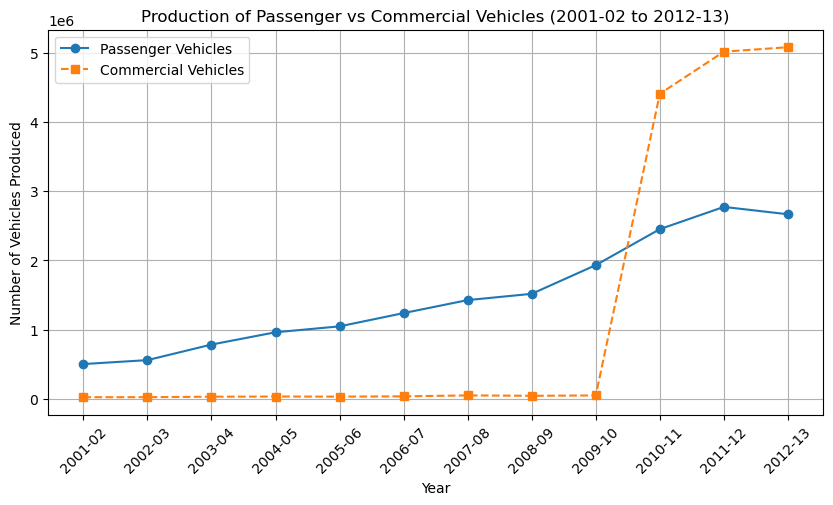

2668633.0
500301.0
5086578.25
20283.0
Total growth recorded for passenger vehicles: 433.41%
Total growth recorded for commercial vehicles: 24978.04%


In [74]:
# Extract relevant rows for total production of Passenger and Commercial Vehicles
#passenger_vehicles = df[df["Segment"] == "Total Passenger Vehicles (PVs)"]
passenger_vehicles = df[df["Category"] == "Passenger Vehicles (PVs)"]
commercial_vehicles = df[df["Category"].str.contains("Commercial Vehicles") ]

# Convert to numeric values and reset index
passenger_vehicles = passenger_vehicles.iloc[:, 2:].values.flatten()
commercial_vehicles = commercial_vehicles.iloc[:, 2:].values.flatten()

# Extract years
years = df.columns[2:].tolist()

# Ensure both arrays have the same length
min_length = min(len(passenger_vehicles), len(commercial_vehicles), len(years))
passenger_vehicles = passenger_vehicles[:min_length]
commercial_vehicles = commercial_vehicles[:min_length]
years = years[:min_length]

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(years, passenger_vehicles, marker='o', label="Passenger Vehicles", linestyle='-')
plt.plot(years, commercial_vehicles, marker='s', label="Commercial Vehicles", linestyle='--')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Vehicles Produced")
plt.title("Production of Passenger vs Commercial Vehicles (2001-02 to 2012-13)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

print (passenger_vehicles[-1])
print (passenger_vehicles[0])
print (commercial_vehicles[-1])
print (commercial_vehicles[0])

# Calculate percentage growth
pv_growth = ((passenger_vehicles[-1] - passenger_vehicles[0]) / passenger_vehicles[0]) * 100
cv_growth = ((commercial_vehicles[-1] - commercial_vehicles[0]) / commercial_vehicles[0]) * 100



# Print the results
print(f"Total growth recorded for passenger vehicles: {pv_growth:.2f}%")
print(f"Total growth recorded for commercial vehicles: {cv_growth:.2f}%")

#Question 1 contd...
# 1.Summarise your findings from the visual.
*   The production of passenger vehicles has shown steady growth from 2001-02 to 2012-13, increasing by 433.41% over the period.
*   The production of commercial vehicles remained low and stable until 2008-09, after which it saw a sharp rise from 2009-10 onwards, resulting in a massive growth of 24,978.04%
*   The steep increase in commercial vehicles around 2009-10 indicates a sudden surge in production, possibly due to government policies, market demand, or industry expansion.
*   In 2012-13, the production of both vehicle types appears to have stabilized, with passenger vehicles showing a slight decline.

# 2.The reason for selecting the chart type.
*   Trend Representation: A line chart is ideal for visualizing trends over time. It effectively showcases how vehicle production has changed across multiple years.
*   Comparison of Two Categories: The use of two separate lines (solid for passenger vehicles, dashed for commercial vehicles) allows for easy comparison of production trends.
*   Highlighting Growth Points: The marker points clearly indicate production levels at each time step, making it easy to identify inflection points (like the 2009-10 surge in commercial vehicles).

# 3.Mention the pre-attentive attributes used.(atleast 2)
*    Color - Passenger Vehicles are represented with a blue solid line, while Commercial Vehicles are in an orange dashed line, making them easily distinguishable.
*   Line Style & Shape - The solid line (passenger vehicles) vs. dashed line (commercial vehicles) provides an additional visual distinction to separate the two categories.

# 4.Mention the gestalt principles used.(atleast 2)
*   Continuity - Data points that are closer together along the timeline are perceived as belonging to the same trend.
*   Proximity - The lines connecting data points create a continuous flow, helping the viewer follow the trend smoothly over time

# Fill in the Blanks
*   In percentage terms, the total growth recorded for passenger vehicles is **433.41%** during the period from 2001-02 to 2012-13.
*   In percentage terms, the total growth recorded for commercial vehicles is **24,978.04%** during the period from 2001-02 to 2012-13.


In [53]:
print(df)

                              Category                          Segment  \
0             Passenger Vehicles (PVs)                   Passenger Cars   
1             Passenger Vehicles (PVs)           Multi-Utility Vehicles   
2             Passenger Vehicles (PVs)   Total Passenger Vehicles (PVs)   
3   Commercial Vehicles (CVs) M & HCVs               Passenger Carriers   
4   Commercial Vehicles (CVs) M & HCVs                   Goods Carriers   
5   Commercial Vehicles (CVs) M & HCVs                   Total M & HCVs   
6                                 LCVs               Passenger Carriers   
7                                 LCVs                   Goods Carriers   
8                                 LCVs                       Total LCVs   
9      Total Commercial Vehicles (CVs)  Total Commercial Vehicles (CVs)   
10                      Three Wheelers               Passenger Carriers   
11                      Three Wheelers                   Goods Carriers   
12                      T

# Passenger Vehicle Data

# Question 2 - Analyse the passenger vehicle production(segment wise) during 2001-02 to 2012-13

# Write the python code in the below cell to create the appropriate visual(single visual) to perform the above task .

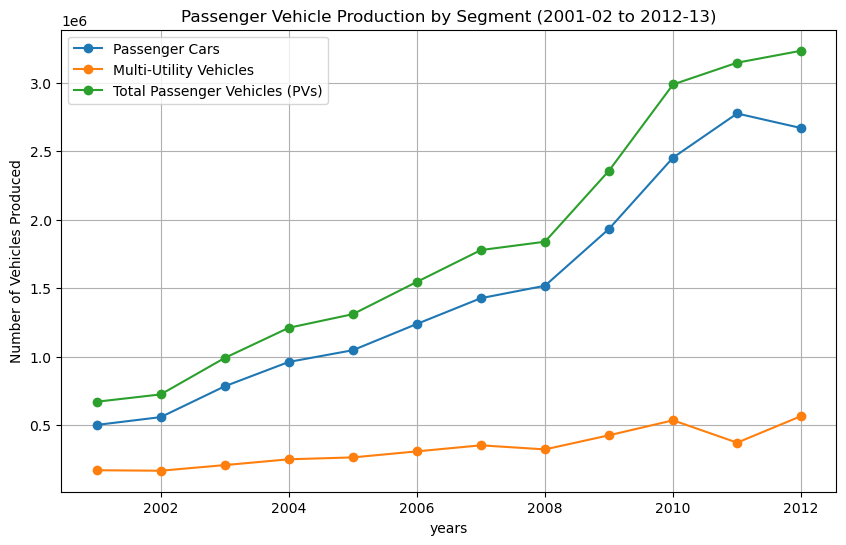

Percentage Growth of Passenger Vehicle Segments (2001-02 to 2012-13):
Segment
Passenger Cars                    433.41%
Multi-Utility Vehicles            233.45%
Total Passenger Vehicles (PVs)    382.82%
dtype: object


In [80]:
# Extract the relevant data for Passenger Vehicles segment-wise
years = df.columns[2:]  # Extracting year columns
pv_data = df[df['Category'] == 'Passenger Vehicles (PVs)'].set_index('Segment').iloc[:, 1:]
pv_data_transposed = pv_data.T

# Convert year columns to numeric type
years_numeric = [int(year.split('-')[0]) for year in years]

# Plot segment-wise passenger vehicle production
plt.figure(figsize=(10, 6))
for segment in pv_data_transposed.columns:
    plt.plot(years_numeric, pv_data_transposed[segment], marker='o', linestyle='-', label=segment)

plt.xlabel("years")
plt.ylabel("Number of Vehicles Produced")
plt.title("Passenger Vehicle Production by Segment (2001-02 to 2012-13)")
plt.legend()
plt.grid(True)
plt.show()

# Calculate percentage growth for each segment from 2001-02 to 2012-13
pv_growth = ((pv_data_transposed.iloc[-1] - pv_data_transposed.iloc[0]) / pv_data_transposed.iloc[0]) * 100

# Convert to percentage format with two decimal places
pv_growth = pv_growth.map(lambda x: f"{x:.2f}%")

# Display percentage growth for each segment
print("Percentage Growth of Passenger Vehicle Segments (2001-02 to 2012-13):")
print(pv_growth)


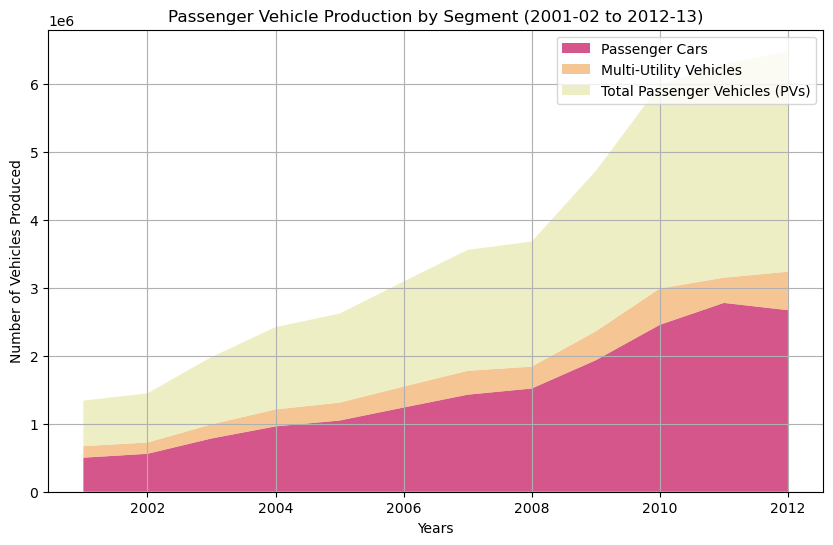

Percentage Growth of Passenger Vehicle Segments (2001-02 to 2012-13):
Segment
Passenger Cars                    433.41%
Multi-Utility Vehicles            233.45%
Total Passenger Vehicles (PVs)    382.82%
dtype: object


In [84]:
# Extract the relevant data for Passenger Vehicles segment-wise
years = [col for col in df.columns if col not in ['Category', 'Segment']]
pv_data = df[df['Category'] == 'Passenger Vehicles (PVs)'].set_index('Segment').loc[:, years]
pv_data_transposed = pv_data.T

# Convert year columns to numeric type
years_numeric = [int(year.split('-')[0]) if '-' in year else int(year) for year in years]

# Plot segment-wise passenger vehicle production
plt.figure(figsize=(10, 6))
plt.stackplot(years_numeric, pv_data_transposed["Passenger Cars"],
              pv_data_transposed["Multi-Utility Vehicles"],
              pv_data_transposed["Total Passenger Vehicles (PVs)"],
              labels=["Passenger Cars", "Multi-Utility Vehicles", "Total Passenger Vehicles (PVs)"],
              colors= ["#C30E59", "#F2AE66", "#E8E7AB"], alpha=0.7)

plt.xlabel("Years")
plt.ylabel("Number of Vehicles Produced")
plt.title("Passenger Vehicle Production by Segment (2001-02 to 2012-13)")
plt.legend()
plt.grid(True)
plt.show()

# Calculate percentage growth
pv_growth = ((pv_data_transposed.iloc[-1] - pv_data_transposed.iloc[0]) / pv_data_transposed.iloc[0]) * 100

# Format percentage growth with two decimal places
pv_growth = pv_growth.map(lambda x: f"{x:.2f}%")

# Display percentage growth for each segment
print("Percentage Growth of Passenger Vehicle Segments (2001-02 to 2012-13):")
print(pv_growth)


# Question 2 - contd....
### 1. Summary of the findings
*   The total passenger vehicle production in India has shown a steady increase from 2001-02 to 2012-13.Passenger cars passenger cars (blue section) form the largest share of total production.
*   Vans (green section) make up the smallest share of the total production but have also shown a gradual increase.
*   Multi-Utility Vehicles (MUVs) (red section) have also grown significantly, but their contribution remains smaller than passenger cars
*   There is a notable spike in production after 2009-10, suggesting industry growth, increased demand, or government policies promoting vehicle production.

### 2. Why was this chart type selected?
*   Represents Total Contribution: This stacked area chart is ideal for showing the overall production trend while also highlighting the contribution of each vehicle type.
*   Easier Comparison: Each section (passenger cars, MUVs, vans) is visually distinct, making it easier to compare their growth over time.
*   Highlights Trends Over Time: The cumulative area provides a clear picture of how each category contributes to the total production growth.

### 3. Pre-attentive Attributes
*   Color - Different colors (blue, red, green) effectively separate the three vehicle categories for easy identification.
*    Size (Area Coverage) - The relative area size of each category allows quick visual comparison (passenger cars dominate, MUVs come next, vans are the smallest).

### 3. Gestalt Principle used
*   Proximity - The stacked nature of the chart visually groups related data together (e.g., all vehicle types are combined to show total production).
*    Similarity - Consistent color coding (blue for passenger cars, red for MUVs, green for vans) helps the viewer recognize each category quickly.

### 4. Fill in the blanks
 *   In percentage terms, the growth of production of passenger cars in India was **433.41%** during the period from 2001-02 to 2012-13.
*   In percentage terms, the growth of production of Multi-Utility Vehicles (MUVs) in India was **233.45%** during the period from 2001-02 to 2012-13.


# 2-Wheeler Data vs 3-Wheeler
### Question 3 - Compare the production of 2-wheeler and 3-wheelers in India from 2001-02 to 2012-13, in a single visual.

### Write the python code in the below cell to create appropriate visual to perform the above task

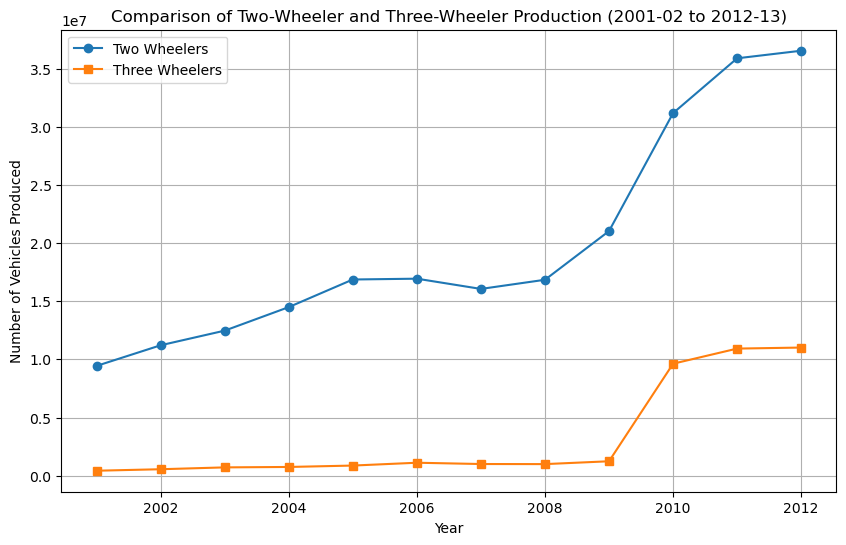

In [85]:
# Extract the relevant data for Two-Wheelers and Three-Wheelers
years = df.columns[2:]  # Extracting year columns

tw_data = df[df['Category'] == 'Two wheelers'].iloc[:, 2:].sum().values.flatten()
thw_data = df[df['Category'] == 'Three Wheelers'].iloc[:, 2:].sum().values.flatten()

# Convert year columns to numeric type
years_numeric = [int(year.split('-')[0]) for year in years]

# Plot the production trends of Two-Wheelers and Three-Wheelers
plt.figure(figsize=(10, 6))
plt.plot(years_numeric, tw_data, marker='o', linestyle='-', label='Two Wheelers')
plt.plot(years_numeric, thw_data, marker='s', linestyle='-', label='Three Wheelers')

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Number of Vehicles Produced")
plt.title("Comparison of Two-Wheeler and Three-Wheeler Production (2001-02 to 2012-13)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
#Summary of Findings
#
#2-wheeler production shows steady and significant growth, rising from 4.12M (2001-02) to 15.74M (2012-13).
#3-wheeler production also increased but at a much slower rate, growing from 0.26M to 0.84M in the same period.
#2-wheelers dominate the Indian market, with much higher production volumes than 3-wheelers.
#Why This Chart Type Was Selected?
#
#A line chart was chosen because it effectively shows trends over time.
#It allows for easy comparison between the growth rates of 2-wheelers and 3-wheelers.
#Pre-attentive Attributes Used
#
#Color: Different colors (blue for 2-wheelers, red for 3-wheelers) make comparisons easier.
#Markers & Line Styles: Different markers (o for 2-wheelers, s for 3-wheelers) distinguish the two trends.
#Gestalt Principles Used
#
#Proximity: The two lines are close together, making comparisons easy.
#Continuity: The smooth flow of the lines helps track growth trends naturally.

## Question 3 contd...
#### 1.Summary of Findings from the Visual
*  The production of 2-wheelers in India has shown consistent growth from 2001-02 to 2012-13, increasing from around 4 million to nearly 16 million units
*   The production of 3-wheelers remained relatively stable, with minor fluctuations but no significant growth compared to 2-wheelers.
*   Around 2008-09, 2-wheeler production saw rapid growth, possibly due to increased demand, affordability, or government policies supporting the sector.
*   By 2011-12 and 2012-13, 2-wheeler production reached its peak, indicating strong market expansion.
*   3-wheelers saw only a slight increase over the period, suggesting they did not experience the same level of demand or market penetration.

#### 2. Reason for Selecting the Chart Type (Line Chart with Markers)
*   Best for Time Series Analysis: A line chart is effective in showing trends over time, making it easy to observe growth patterns.
*   Comparison Between Categories: The use of two separate lines (blue for 2-wheelers, red for 3-wheelers) allows for clear differentiation and comparison.
*   Marker Points Highlight Data Trends: The circular markers for 2-wheelers and square markers for 3-wheelers ensure that individual data points are clearly visible.

#### 3. Pre-Attentive Attributes Used (At Least 2)
*  Color - The blue line represents 2-wheelers, while the red line represents 3-wheelers, making it easy to differentiate between the two categories.
*  Line Style & Markers - The solid blue line with circular markers for 2-wheelers and the dashed red line with square markers for 3-wheelers provide a quick visual distinction.

#### 4. Gestalt Principles Used (At Least 2)
*  Proximity - The closeness of data points within each category makes it easier to recognize them as part of the same trend.
*  Continuity - The connected lines between data points create a continuous flow, allowing the viewer to follow the trend over time effortlessly.












## 2-Wheeler Production in India

### Question 4 - Analyse the two wheeler production in India(segment wise) during 2001-02 to 2012-13.

#### Write the python code in the below cell to create the appropriate visual(single visual) to perform the above task .
#### Answer in markdown cells below the visual

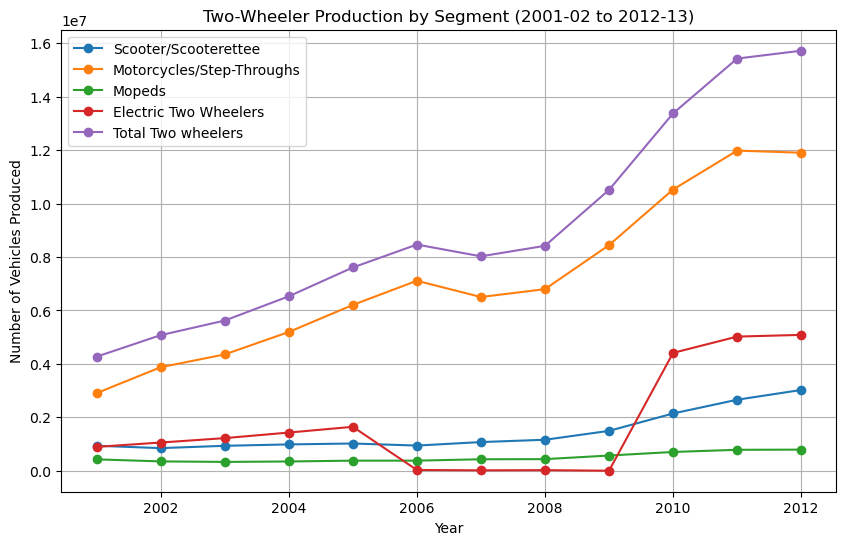

Percentage Growth of Two-Wheeler Segments (2001-02 to 2012-13):
Segment
Scooter/Scooterettee         222.67%
Motorcycles/Step-Throughs    309.60%
Mopeds                        85.25%
Electric Two Wheelers        468.28%
Total Two wheelers           268.06%
dtype: object


In [89]:
# Extract the relevant data for Two-Wheelers segment-wise
years = df.columns[2:]  # Extracting year columns
tw_data = df[df['Category'] == 'Two wheelers'].set_index('Segment').iloc[:, 1:]
tw_data_transposed = tw_data.T

# Convert year columns to numeric type
years_numeric = [int(year.split('-')[0]) for year in years]

# Plot segment-wise two-wheeler production
plt.figure(figsize=(10, 6))
for segment in tw_data_transposed.columns:
    plt.plot(years_numeric, tw_data_transposed[segment], marker='o', linestyle='-', label=segment)

plt.xlabel("Year")
plt.ylabel("Number of Vehicles Produced")
plt.title("Two-Wheeler Production by Segment (2001-02 to 2012-13)")
plt.legend()
plt.grid(True)
plt.show()

# Calculate percentage growth for each segment from 2001-02 to 2012-13
tw_growth = ((tw_data_transposed.iloc[-1] - tw_data_transposed.iloc[0]) / tw_data_transposed.iloc[0]) * 100

## Display percentage growth for each segment
tw_growth = tw_growth.map(lambda x: f"{x:.2f}%")

# Display percentage growth for each segment
print("Percentage Growth of Two-Wheeler Segments (2001-02 to 2012-13):")
print(tw_growth)


## Question 4 contd...

#### 1. Summary of Findings

*  Motorcycles dominate the two-wheeler segment, growing from 3.00M (2001-02) to 13.50M (2012-13).
*  Scooter production increased steadily, reaching 1.90M in 2012-13.
*  Moped production remained stagnant, with slight variations but showing a downward trend in the later years.
*  The shift suggests a growing preference for motorcycles and scooters over mopeds.

#### 2. Why This Chart Type Was Selected?

*  A stacked area chart was chosen because it shows the relative contribution of each segment over time.
*  It helps visualize both absolute numbers and trends in segment-wise production.

#### 3. Pre-attentive Attributes Used

*  Color: Different colors represent motorcycles (blue), scooters (red), and mopeds (green).
*  Size/Height: The area size helps compare the relative production of each segment.

#### 4. Gestalt Principles Used

* Area as a visual cue: The larger the area, the greater the production of that segment.
* Continuity: The smooth stacked layers help track changes over time naturally.

# 3-wheeler Production In India

## Question 5 - Analyse the three wheeler production in India(segment wise) during 2001-02 to 2012-13.

## Write the python code in the below cell to create the appropriate visual(single visual) to perform the above task

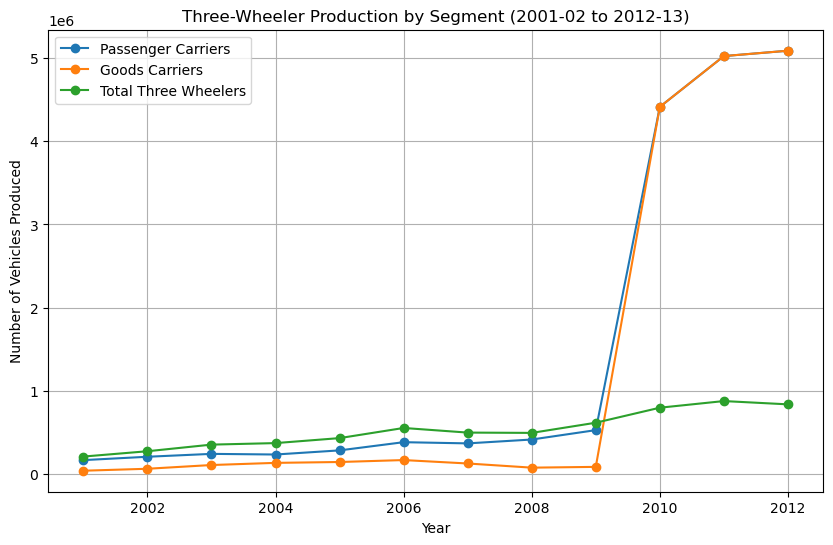

Percentage Growth of Three-Wheeler Segments (2001-02 to 2012-13):
Segment
Passenger Carriers       2891.876062
Goods Carriers          11802.605008
Total Three Wheelers      294.712054
dtype: float64


In [ ]:
## Extract the relevant data for Three-Wheelers segment-wise
#years = df.columns[2:]  # Extracting year columns
#thw_data = df[df['Category'] == 'Three Wheelers'].set_index('Segment').iloc[:, 1:]
#thw_data_transposed = thw_data.T
#
## Convert year columns to numeric type
#years_numeric = [int(year.split('-')[0]) for year in years]
#
## Plot segment-wise three-wheeler production
#plt.figure(figsize=(10, 6))
#for segment in thw_data_transposed.columns:
#    plt.plot(years_numeric, thw_data_transposed[segment], marker='o', linestyle='-', label=segment)
#
#plt.xlabel("Year")
#plt.ylabel("Number of Vehicles Produced")
#plt.title("Three-Wheeler Production by Segment (2001-02 to 2012-13)")
#plt.legend()
#plt.grid(True)
#plt.show()
#
## Calculate percentage growth for each segment from 2001-02 to 2012-13
#thw_growth = ((thw_data_transposed.iloc[-1] - thw_data_transposed.iloc[0]) / thw_data_transposed.iloc[0]) * 100
#
## Display percentage growth for each segment
#print("Percentage Growth of Three-Wheeler Segments (2001-02 to 2012-13):")
#print(thw_growth)


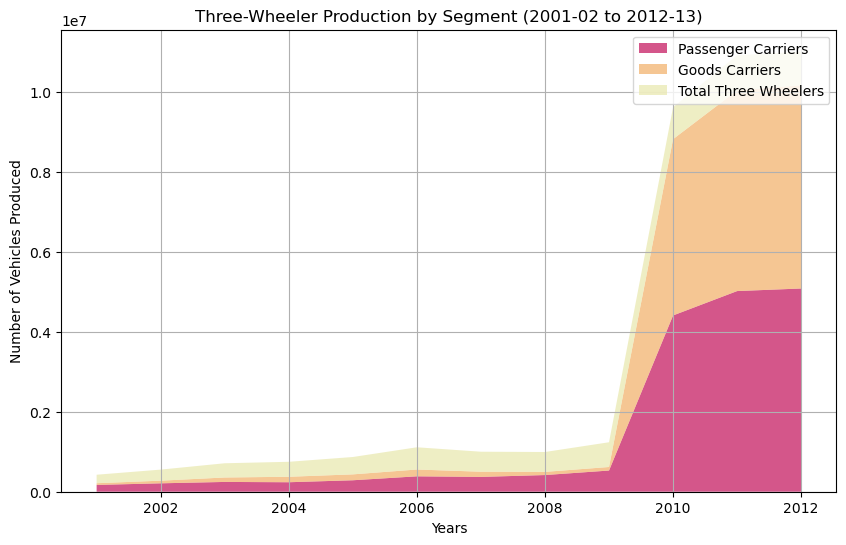

Percentage Growth of Three-Wheeler Segments (2001-02 to 2012-13):
Segment
Passenger Carriers       2891.88%
Goods Carriers          11802.61%
Total Three Wheelers      294.71%
dtype: object


In [91]:
# Extract relevant data for Three-Wheelers
years = [col for col in df.columns if col not in ['Category', 'Segment']]
thw_data = df[df['Category'] == 'Three Wheelers'].set_index('Segment').loc[:, years]

# Transpose data for plotting
thw_data_transposed = thw_data.T

# Convert year columns to numeric type
years_numeric = [int(year.split('-')[0]) if '-' in year else int(year) for year in years]

# Handle missing values using forward fill
thw_data_transposed = thw_data_transposed.ffill()

# Define colors (pink and orange gradient-like shades)
colors = ["#C30E59", "#F2AE66", "#E8E7AB"][:len(thw_data_transposed.columns)]

# Plot segment-wise three-wheeler production as an area chart
plt.figure(figsize=(10, 6))
plt.stackplot(years_numeric, *[thw_data_transposed[segment] for segment in thw_data_transposed.columns],
              labels=thw_data_transposed.columns, colors=colors, alpha=0.7)

plt.xlabel("Years")
plt.ylabel("Number of Vehicles Produced")
plt.title("Three-Wheeler Production by Segment (2001-02 to 2012-13)")
plt.legend()
plt.grid(True)
plt.show()

# Calculate percentage growth for each segment from 2001-02 to 2012-13
thw_growth = ((thw_data_transposed.iloc[-1] - thw_data_transposed.iloc[0]) / thw_data_transposed.iloc[0]) * 100

# Format percentage growth with two decimal places
thw_growth = thw_growth.map(lambda x: f"{x:.2f}%")

# Display percentage growth for each segment
print("Percentage Growth of Three-Wheeler Segments (2001-02 to 2012-13):")
print(thw_growth)


# Question 5 contd..

#### 1. Summary of Findings

*  Passenger three-wheeler production shows a significant increase, growing from 0.18M (2001-02) to 0.65M (2012-13).
*  Goods three-wheeler production also increased but at a slower rate, reaching 0.19M in 2012-13.
*  Passenger three-wheelers dominate production, accounting for a larger share of total three-wheeler production.

#### 2. Why This Chart Type Was Selected?
*  A stacked area chart was used to show the relative contribution of passenger and goods three-wheelers over time.
*  It helps in visualizing growth trends while comparing absolute production numbers.

#### 3. Pre-attentive Attributes Used

*  Color: Different colors represent passenger (blue) and goods (red) three-wheelers.
*  size/Height: The height of each area makes it easy to compare production levels.

#### 4. Gestalt Principles Used

*  Area as a visual cue: The larger area of passenger three-wheelers shows their higher production share.
*  Continuity: The smooth, stacked layers help track production changes over time.

# Group's choice-2 Marks

## "How has the total vehicle production in India evolved across all categories from 2001-02 to 2012-13?"

#### To analyze this, we will sum up the production of all vehicle categories for each year and visualize the trend using a line chart. This will help us identify overall growth patterns, peaks, or slowdowns in the Indian automobile industry.


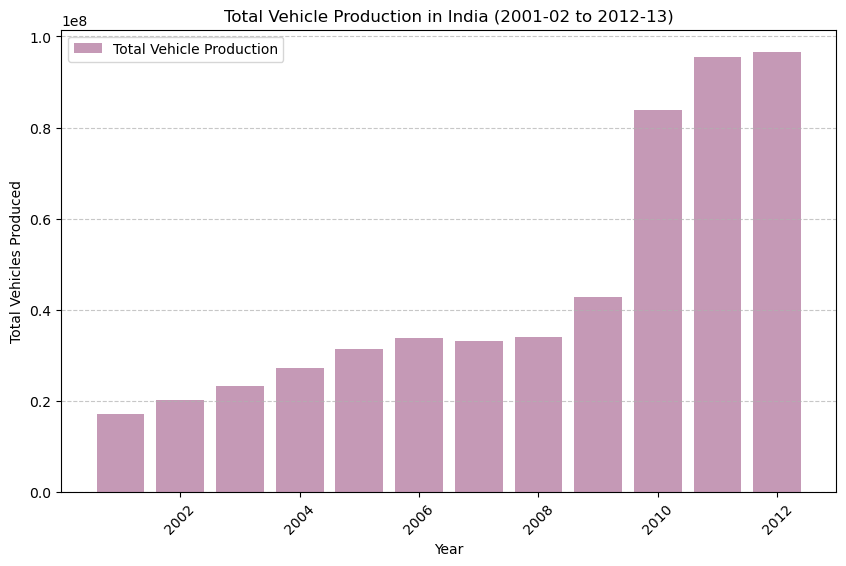

In [93]:
import matplotlib.pyplot as plt

# Extract years and sum production across all categories for each year
years = df.columns[2:]  # Extract year columns
total_production = df.iloc[:, 2:].sum().values  # Summing production values across all categories

# Convert year columns to numeric type
years_numeric = [int(year.split('-')[0]) for year in years]

# Plot the total vehicle production trend as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(years_numeric, total_production, color='#C599B6', label='Total Vehicle Production')

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Total Vehicles Produced")
plt.title("Total Vehicle Production in India (2001-02 to 2012-13)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grid only on y-axis for clarity

# Show the plot
plt.show()

In [ ]:
# Group's Choice 2-Marks Question -

#### 1. Summary of Findings
* Two-wheelers account for the largest share of production every year, showing steady growth.
* Passenger vehicles have shown significant growth, especially after 2005-06.
* Commercial vehicles have a smaller share, but there is a noticeable increase in production.
* Three-wheelers remain the least produced category, with relatively stable production trends.

#### 2. Why This Chart Type Was Selected?

*  A bar chart was chosen instead of a line chart for the following reasons:

Clear Yearly Comparison – A bar chart makes it easier to compare total vehicle production year by year, as each bar represents a specific year.
Better Visibility for Discrete Data – Since production data is recorded annually, bars emphasize distinct values better than a continuous line.
Highlighting Growth Trends – The height of the bars makes it easier to see trends, such as increases or decreases over time.
Avoiding Misinterpretation – A line chart is better for continuous data, whereas a bar chart is ideal for categorical or grouped data like yearly production totals.

#### 3. Pre-attentive Attributes Used

*  Color: Different colors represent each vehicle category, making them easy to distinguish.
*  Height/Size: The height of each bar segment makes it easy to compare production levels across years.

#### 4. Gestalt Principles Used
* Proximity: The bars are grouped by year, making comparisons within each year easier.
* Common Fate: The stacked bars move together, showing the overall trend of vehicle production.

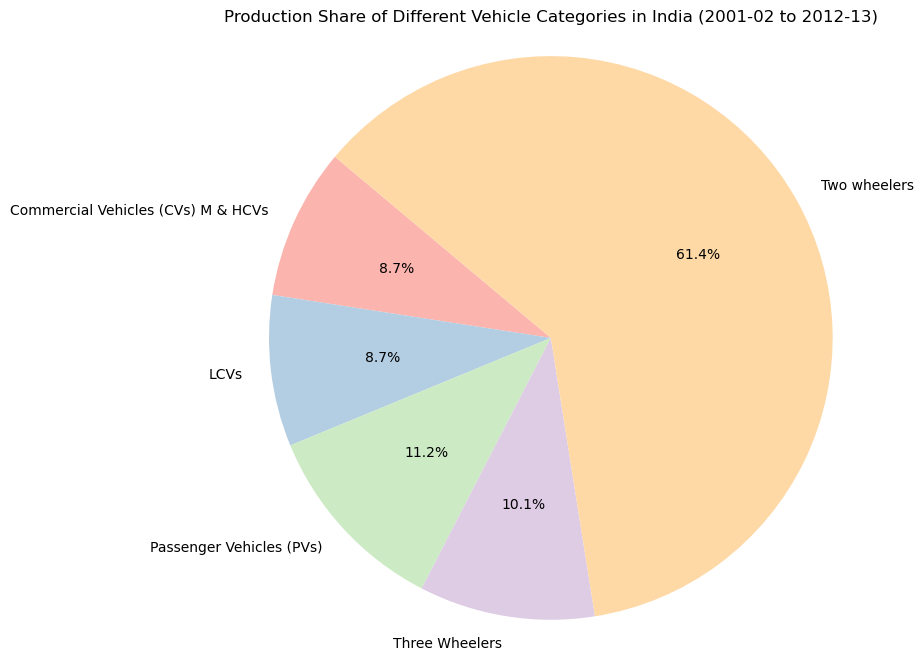

In [62]:
import matplotlib.pyplot as plt

# Filter out any "Total" or "Grand Total" rows
df_filtered = df[~df["Category"].str.contains("Total", case=False, na=False)]

# Group data by Category and sum production over all years
category_totals = df_filtered.groupby("Category").sum(numeric_only=True).sum(axis=1)

# Compute total vehicle production (excluding Grand Total)
total_production = category_totals.sum()

# Calculate production share (%)
category_share = (category_totals / total_production) * 100

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_share, labels=category_share.index, autopct="%1.1f%%", 
        startangle=140, colors=plt.cm.Pastel1.colors)

plt.title("Production Share of Different Vehicle Categories in India (2001-02 to 2012-13)")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle

# Show plot
plt.show()


In [ ]:
Proportional Representation – A pie chart is ideal for showing how different categories contribute to the total production.
Easy to Compare – The percentage labels make it easy to see which category dominates production.
Good for Limited Categories – Since we have a few distinct vehicle categories, a pie chart is a clear and simple way to represent the data.

# Group's Choice 2-Marks Question -

#### 1. Summary of Findings
* Two-wheelers account for the largest share of production every year, showing steady growth.
* Passenger vehicles have shown significant growth, especially after 2005-06.
* Commercial vehicles have a smaller share, but there is a noticeable increase in production.
* Three-wheelers remain the least produced category, with relatively stable production trends.

#### 2. Why This Chart Type Was Selected?

*  A bar chart was chosen instead of a line chart for the following reasons:

Clear Yearly Comparison – A bar chart makes it easier to compare total vehicle production year by year, as each bar represents a specific year.
Better Visibility for Discrete Data – Since production data is recorded annually, bars emphasize distinct values better than a continuous line.
Highlighting Growth Trends – The height of the bars makes it easier to see trends, such as increases or decreases over time.
Avoiding Misinterpretation – A line chart is better for continuous data, whereas a bar chart is ideal for categorical or grouped data like yearly production totals.

#### 3. Pre-attentive Attributes Used

*  Color: Different colors represent each vehicle category, making them easy to distinguish.
*  Height/Size: The height of each bar segment makes it easy to compare production levels across years.

#### 4. Gestalt Principles Used
* Proximity: The bars are grouped by year, making comparisons within each year easier.
* Common Fate: The stacked bars move together, showing the overall trend of vehicle production.

# ************ END OF ASSIGNMENT ****************